In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from performance_utils import performance_for_df, NAV_df_plot

In [2]:
start_date = pd.Timestamp("2000-01-01")
end_date = pd.Timestamp("2019-12-31")

In [4]:
spy = yf.download("SPY", start=start_date, end=end_date)
r2k = yf.download("IWM", start=start_date, end=end_date)
rtn_df = pd.concat([spy["Adj Close"].pct_change().dropna(), 
                    r2k["Adj Close"].pct_change().dropna()],
                    axis=1, join="inner")
rtn_df.columns = ["SPY", "R2K"]
rtn_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,SPY,R2K
Date,,
2000-05-30 00:00:00-04:00,0.032609,0.036911
2000-05-31 00:00:00-04:00,0.002193,0.003625
2000-06-01 00:00:00-04:00,0.017506,0.022660
2000-06-02 00:00:00-04:00,0.017419,0.052023
2000-06-05 00:00:00-04:00,-0.004862,-0.003662


,SPY,R2K
Simple Return,2.375979,3.687088
Annualized Return,0.064193,0.082200
Annualized Volatility,0.187418,0.230815
Sharpe Ratio,0.342514,0.356129
Sortino Ratio,0.437632,0.492834
Maximum Drawdown,0.551894,0.586400
Calmar Ratio,0.116314,0.140177


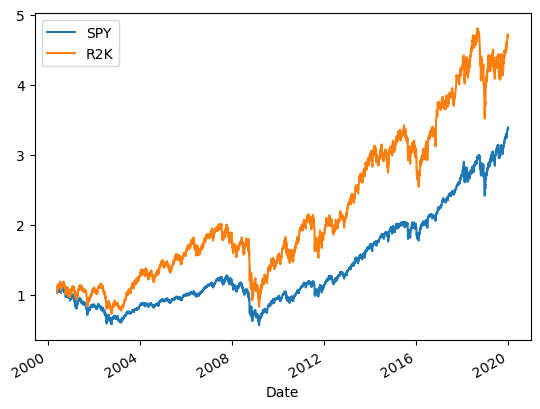

In [5]:
nav_df, result_df = performance_for_df(rtn_df, rf=0.0)
nav_df.plot()
result_df

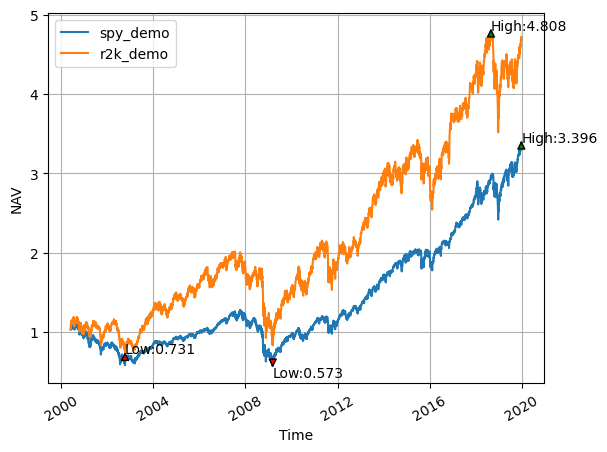

<Figure size 640x480 with 0 Axes>

In [9]:
NAV_df_plot(nav_df, nav_df.columns.tolist(), nav_df.columns.tolist(),
            labels=["spy_demo", "r2k_demo"], grid=True, fig_path="demo.png")